# Introduction

In today's digital landscape, the Google Play Store serves as a pivotal platform for Android apps, housing millions of applications spanning various categories. For developers and marketers, understanding user preferences, sentiments, and behaviors within this ecosystem is paramount for app success.

# Objective:
As a data analyst, I aim to utilize two datasets: one containing Google Play app information and another with user reviews and sentiment analysis to identify the key factors contributing to the success of mobile applications on the Google Play Store. Ultimately, this analysis will provide actionable insights to app developers and marketers, enabling them to optimize app development, refine marketing strategies, and enhance user experiences, thereby increasing the likelihood of app success on the Google Play Store.

In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [128]:
playstore = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
reviews = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv')

In [129]:
playstoredf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [130]:
print(playstoredf.shape)
print('\n')
print(reviews.shape)

(10841, 13)


(64295, 5)


In [131]:
print(playstoredf.info())
print('\n')
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dty

In [132]:
print(playstore.isnull().sum())
print('\n')
print(reviews.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


# Data Preprocessing

In [133]:
#handling missing values
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [134]:
threshold = len(playstore) * 0.05
cols_to_drop = playstore.columns[playstore.isna().sum() <= threshold]
playstore.dropna(subset=cols_to_drop,inplace=True)

In [135]:
playstore.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [136]:
playstore[playstore['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Since there is no way to deal with right now We will not drop na values in review

In [137]:
#Chaning types
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [138]:
playstore.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [139]:
#changing date
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

playstore['Installs'] = playstore['Installs'].str.replace(r'[,+]', '', regex=True)
playstore['Installs'] = playstore['Installs'].astype('int')

playstore['Reviews'] = playstore['Reviews'].astype('int')


In [140]:
playstore.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [141]:
reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [142]:
# droppping NA values
# since we need Sentinment to perform any Sentimental Analysis
# we can drop those with NA values in Sentiment

reviews.dropna(subset=['Sentiment'],inplace = True)

In [143]:
reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [144]:
reviews.dropna(inplace= True)
reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [145]:
reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [146]:
playstore[playstore.duplicated]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,10000000,Free,0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,1000000,Free,0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,100000000,Free,0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000,Free,0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


In [147]:
# Removing Duplicates
col = ['App','Size','Type','Genres','Last Updated','Current Ver']
playstore.drop_duplicates(subset=col , keep='first',inplace = True)

In [149]:
playstore[playstore.duplicated(['App','Size','Type','Genres','Last Updated'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6286,"Moco - Chat, Meet People",DATING,4.2,313769,Varies with device,10000000,Free,0,Mature 17+,Dating,2018-08-04,2.6.142,4.1 and up


# ANALYSIS

In [151]:
playstore.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
996,Funny Pics,ENTERTAINMENT,3.9,9941,Varies with device,1000000,Free,0,Teen,Entertainment,2017-07-07,Varies with device,Varies with device
8893,WhatsVPN - Unlimited Free VPN,TOOLS,4.7,24985,7.8M,500000,Free,0,Everyone,Tools,2018-07-27,2.2.927,4.1 and up
10590,Florida - Pocket Brainbook,BOOKS_AND_REFERENCE,4.6,7,12M,1000,Free,0,Everyone,Books & Reference,2018-03-19,1.0.9,4.4 and up
4915,"AC Air condition Troubleshoot,Repair,Maintenance",BOOKS_AND_REFERENCE,4.2,27,3.1M,5000,Free,0,Everyone,Books & Reference,2018-02-07,1.1,4.0 and up
1165,Bank of America Mobile Banking,FINANCE,4.4,341090,53M,10000000,Free,0,Everyone,Finance,2018-07-31,7.8.8,4.4 and up
10228,FB Photographie,PHOTOGRAPHY,4.7,37,10M,1000,Free,0,Everyone,Photography,2016-05-22,2.0,4.0 and up
765,Ready4 SAT (Prep4 SAT),EDUCATION,4.6,13612,48M,100000,Free,0,Everyone,Education,2018-05-10,7.2.3633,4.4 and up
7052,Badische Zeitung,NEWS_AND_MAGAZINES,3.9,262,22M,10000,Free,0,Everyone,News & Magazines,2018-06-26,5.3,4.1 and up
7101,Register.ca Mobile,PRODUCTIVITY,NaN,0,1.2M,100,Free,0,Everyone,Productivity,2016-08-19,2.0,5.0 and up
9971,AÖF Ev İdaresi 1. Sınıf,FAMILY,NaN,2,11M,1000,Free,0,Everyone,Education,2018-07-15,3.0,4.1 and up


In [152]:
reviews.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
54142,Goal Live Scores,Developers work instant data update in-app sta...,Positive,0.275000,0.704167
63298,Honkai Impact 3rd,Beautiful game. Best mobile game I ever played...,Positive,0.381250,0.575000
59975,Happify,Useful helping flourish better,Positive,0.400000,0.250000
19718,"CBS Sports App - Scores, News, Stats & Watch Live",CBS sports best sports information coverage need.,Positive,1.000000,0.300000
20323,CNBC: Breaking Business News & Live Market Data,The new updated easy navigate. The interactive...,Positive,0.314899,0.595960
62140,"Hily: Dating, Chat, Match, Meet & Hook up",DO NOT DOWNLOAD!!!!!! They offer 7 day free tr...,Negative,-0.054762,0.334524
14397,"BestCam Selfie-selfie, beauty camera, photo ed...",Nice cool,Positive,0.475000,0.825000
29354,Cooking Madness - A Chef's Restaurant Games,Nice large game takes space phone do.✌,Positive,0.138095,0.609524
43463,Fallout Shelter,One favorite ever. With addition quests feels ...,Neutral,0.000000,0.480000
6312,Amazon Drive,Very good way clear recents file without delet...,Positive,0.202000,0.472667


In [153]:
reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## Q) Which app categories have the highest average ratings and user reviews?


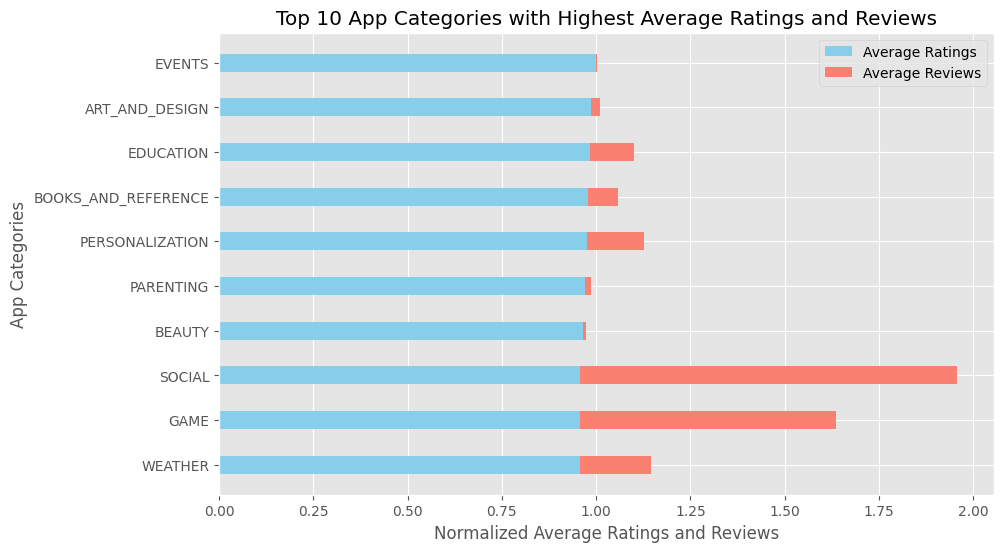

In [222]:
df = playstore.groupby('Category',as_index=False)[['Rating','Reviews']].mean().\
sort_values(by=['Rating','Reviews'],ascending = False).head(10)

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]
reviews = df['Reviews'][::-1]

# Normalize the data
ratings_norm = ratings / np.max(ratings)
reviews_norm = reviews / np.max(reviews)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(categories))

plt.barh(index, ratings_norm, bar_width, color='skyblue', label='Average Ratings')
plt.barh(index, reviews_norm, bar_width, color='salmon', label='Average Reviews', left=ratings_norm)

# Add labels and title
plt.xlabel('Normalized Average Ratings and Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings and Reviews')
plt.yticks(index, categories)
plt.legend()

# Show plot
plt.show()

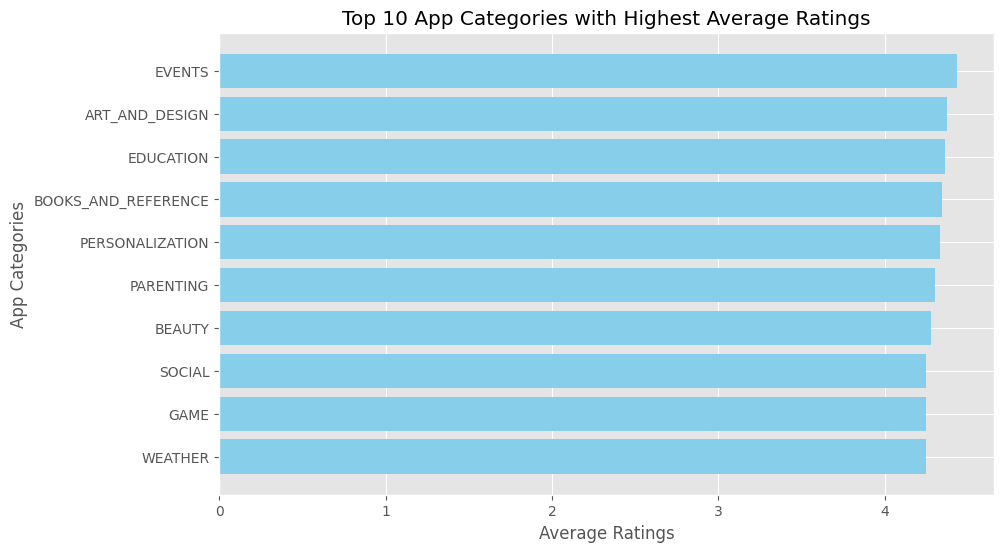

In [223]:
df = playstore.groupby('Category',as_index=False)['Rating'].mean().\
     sort_values(by='Rating',ascending = False).head(10)

# sns.barplot(data=df, y='Category',x='Rating')
# plt.title("Top 10 App Categories with Highest Average ")
# plt.show()

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, ratings, color='skyblue')

plt.xlabel('Average Ratings')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings')

# Show plot
plt.show()

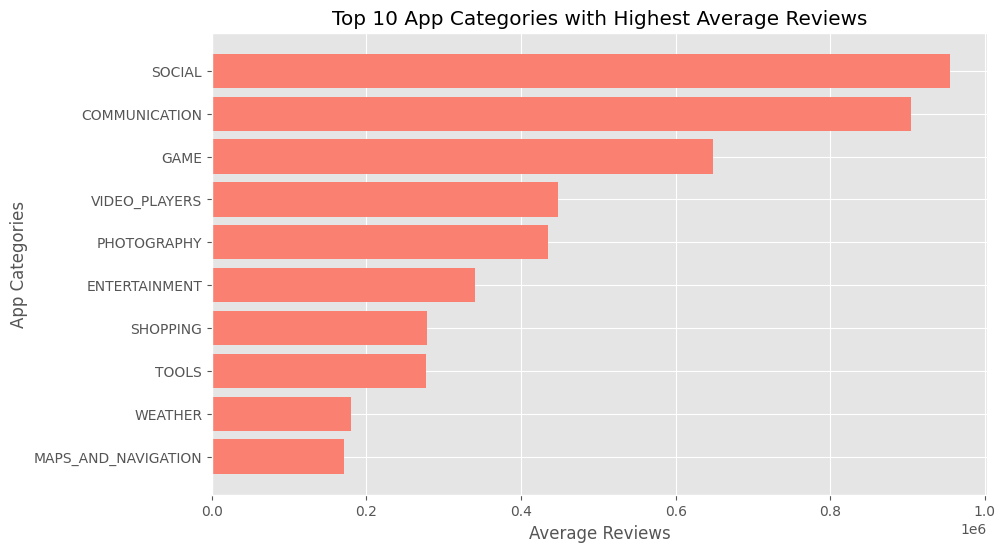

In [224]:
df = playstore.groupby('Category',as_index=False)['Reviews'].mean().\
     sort_values(by='Reviews',ascending = False).head(10)

# sns.barplot(data=df, y='Category',x='Reviews')
# plt.title("Top 10 App Categories with Highest Average Reviews")
# plt.show()

categories = df['Category'][::-1]
reviews = df['Reviews'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, reviews, color='salmon')

# Add labels and title
plt.xlabel('Average Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Reviews')

# Show plot
plt.show()

While 